## setup data

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/top100music.csv')

In [5]:
data.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,url
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91,https://www.youtube.com/watch?v=fHI8X4OXluQ
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,https://www.youtube.com/watch?v=E07s5ZYygMg
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,NaN
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,NaN
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,NaN


In [8]:
data.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


## Network Graph

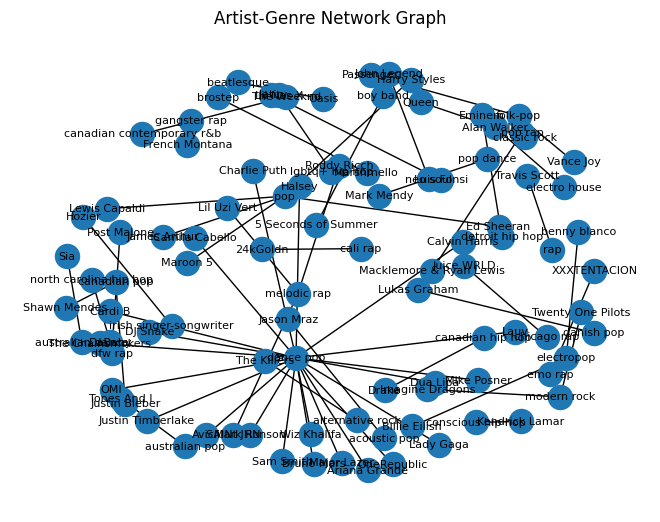

In [3]:


# Load the data
df = data

# Create the graph
G = nx.from_pandas_edgelist(df, source='artist', target='top genre')

# Customize the graph
pos = nx.spring_layout(G, k=0.6)  # layout the graph using the spring layout algorithm
nx.draw(G, pos=pos, with_labels=True, font_size=8) 
plt.title('Artist-Genre Network Graph')

# Render the graph
plt.show()


## Network graph to find path of artist to genre
ex. Maroon 5 to pop

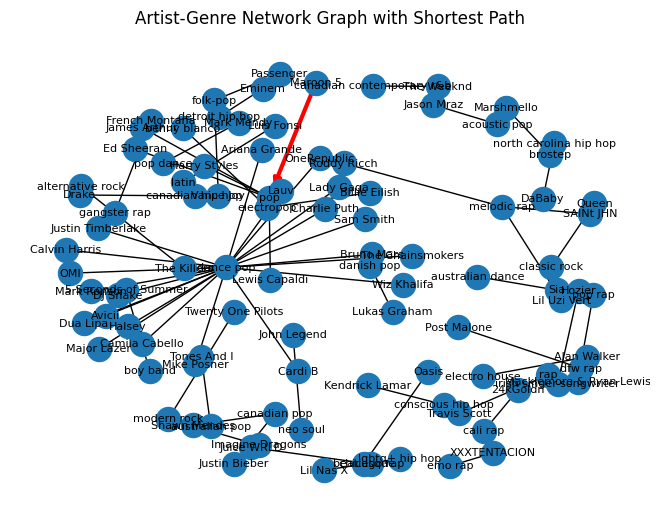

In [ ]:
df = data

# Create the graph
G = nx.from_pandas_edgelist(df, source='artist', target='top genre')

# Find the shortest path between two nodes
start_node = 'Maroon 5'
end_node = 'pop'
path = nx.shortest_path(G, start_node, end_node)

# Create a new graph with only the shortest path
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_G = nx.DiGraph()
path_G.add_edges_from(path_edges)

# Customize the graph
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos=pos, with_labels=True, font_size=8)
nx.draw_networkx_edges(path_G, pos=pos, edge_color='r', width=3)

plt.title('Artist-Genre Network Graph with Shortest Path')
plt.show()